<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-03-23 14:00:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  30.5MB/s    in 1.1s    

2022-03-23 14:00:09 (30.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [17]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Demo: How to list all tables


In [15]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [20]:
QUERY = """
SELECT Country,Age, COUNT(*) as count
FROM master
group by Country
order by Country
"""
pd.read_sql_query(QUERY,conn)

,Country,Age,count
0,Afghanistan,24.0,2
1,Albania,37.0,12
2,Algeria,30.0,3
3,Argentina,NaN,71
4,Armenia,24.0,12
...,...,...,...
130,Uzbekistan,37.0,2
131,"Venezuela, Bolivarian Republic of...",26.0,7
132,Viet Nam,37.0,12
133,Yemen,30.0,1


## Demo: How to describe a table


In [48]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

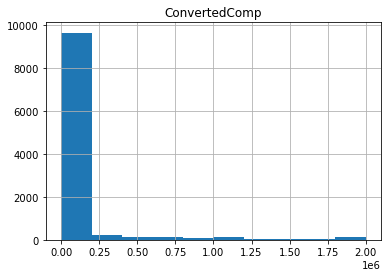

In [36]:
# your code goes here
QUERY= "SELECT * FROM master"

df= pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

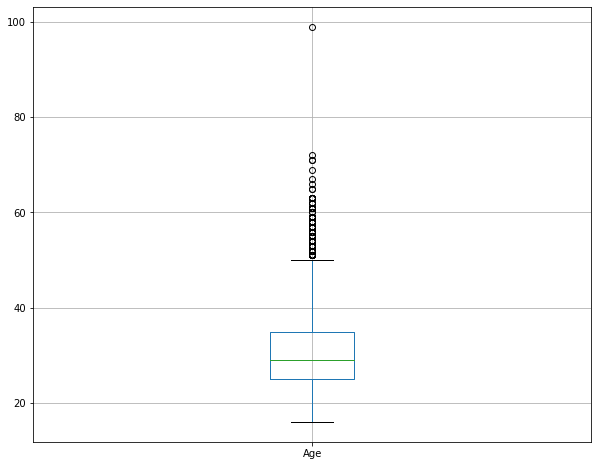

In [39]:
# your code goes here
# your code goes here
QUERY= "SELECT * FROM master"

df= pd.read_sql_query(QUERY,conn)
df.boxplot(column="Age",figsize=(10,8))


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


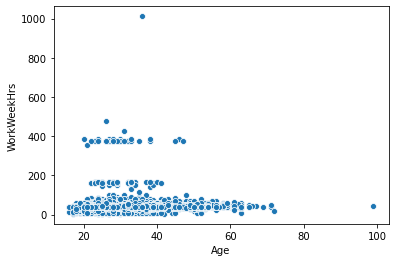

In [43]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
QUERY= "SELECT * FROM master"

df= pd.read_sql_query(QUERY,conn)

plot = sns.scatterplot(x="Age",y="WorkWeekHrs",data= df)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0, 0.5, 'Code rev hrs')

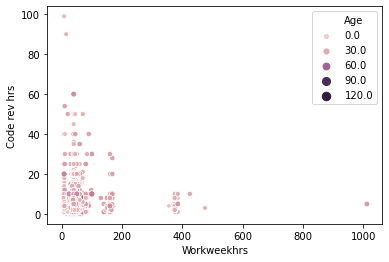

In [46]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)

plot= sns.scatterplot(x="WorkWeekHrs",y="CodeRevHrs",size="Age",hue="Age",data = df1)

plt.xlabel('Workweekhrs')

plt.ylabel("Code rev hrs")


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


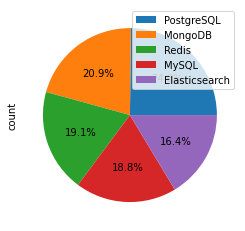

In [76]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY  COUNT(DatabaseDesireNextYear) DESC LIMIT 5
"""

#QUERY =""" SELECT * FROM DatabaseDesireNextYear """
df2 =pd.read_sql_query(QUERY,conn)
df2.set_index('DatabaseDesireNextYear', inplace=True)              -- if this is not done then we dont have names for the pie parts , so index ins imp
df2['count'].plot(kind="pie",autopct='%0.1f%%',labels=None)
plt.legend(labels=df2.index, loc='upper right')

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

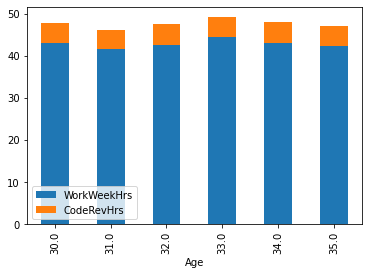

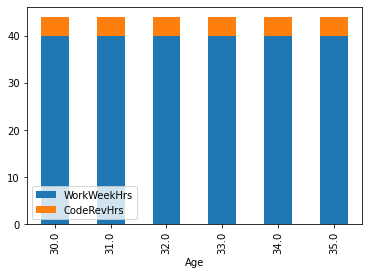

In [86]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE Age BETWEEN 30 AND 35
"""
df=pd.read_sql_query(QUERY,conn)
df1= df.groupby('Age').mean()
df2=df.groupby('Age').median()
df1.plot(kind= "bar",stacked= True)
df2.plot(kind='bar',stacked= True)


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 0, 'Age')

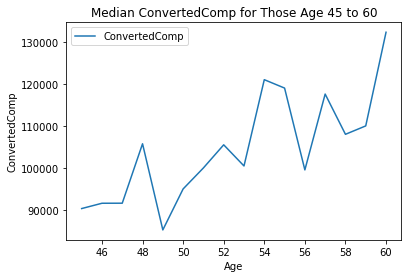

In [93]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

QUERY = """
SELECT ConvertedComp, Age FROM master WHERE Age BETWEEN 45 AND 60
"""
df=pd.read_sql_query(QUERY,conn)
df1= df.groupby('Age').median()
#df2=df.groupby('Age').median()
df1.plot(kind= "line",stacked= True)
#df2.plot(kind='bar',stacked= True)
plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.xlabel('Age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

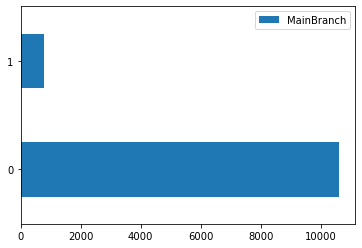

In [97]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch FROM master group by MainBranch
"""
df=pd.read_sql_query(QUERY,conn)

#df2=df.groupby('Age').median()
df.plot(kind= "barh",stacked= True)
#df2.plot(kind='bar',stacked= True)


Close the database connection.


In [98]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
